## Load the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [2]:
## Load the data from your file or data source.

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
## Show first 5 rows

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
## Show last 5 rows

In [7]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
## Show the info for data

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
## Show the columns

In [11]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [12]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [13]:
## Show the description summary for numerical and categorical values.

In [14]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


# Exploratory Data Analysis

In [15]:
def calculation(df):
    
    casual = df['casual']
    register = df['registered']
    casual_per_day = 15
    register_per_day = 10
    tax_percent = 0.18
    maintain_per_hour = 1500/(365*24)
    profit = (casual*casual_per_day)+(register*register_per_day)
    profit_with_Taxes = profit-(profit*tax_percent)
    total_profit = profit_with_Taxes - maintain_per_hour
    return total_profit

train['profit'] = train[['casual','registered']].apply(calculation, axis = 1)
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,143.328767
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,360.628767
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,282.728767
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,118.728767
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,8.028767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2783.728767
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2017.028767
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,1393.828767
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,1106.828767


### Profit per day

In [16]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [17]:
train['Year'] = train['datetime'].dt.year

In [18]:
train['Month'] = train['datetime'].dt.month_name()

In [19]:
train['Day_of_week'] = train['datetime'].dt.day_name()

In [20]:
train['Hour'] = train['datetime'].dt.hour

In [21]:
train.groupby('Day_of_week').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
Day_of_week,,,,,,,,
Friday,1529.0,1749.260422,1520.903578,8.028767,454.928767,1488.128767,2562.328767,8027.628767
Monday,1551.0,1683.392919,1581.051485,8.028767,360.628767,1299.528767,2523.378767,8392.528767
Saturday,1584.0,1873.347580,1793.552749,8.028767,400.603767,1258.528767,2973.353767,7855.428767
Sunday,1579.0,1716.625221,1634.768445,8.028767,389.328767,1074.028767,2824.728767,7219.928767
Thursday,1553.0,1716.086655,1619.921759,8.028767,368.828767,1356.928767,2492.628767,7888.228767
Tuesday,1539.0,1649.779060,1608.091893,8.028767,307.328767,1279.028767,2418.828767,8642.628767
Wednesday,1551.0,1637.140373,1649.821772,8.028767,327.828767,1184.728767,2402.428767,8384.328767


In [22]:
train.groupby('Month').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
April,909.0,1689.520406,1685.466752,8.028767,311.428767,1180.628767,2550.028767,7334.728767
August,912.0,2125.813636,1766.989958,12.128767,618.928767,1783.328767,3054.328767,7888.228767
December,912.0,1505.949381,1333.452512,8.028767,381.128767,1190.878767,2213.828767,6313.828767
February,901.0,944.162063,939.959233,8.028767,225.328767,664.028767,1369.228767,5030.528767
January,884.0,774.469039,819.877646,8.028767,166.903767,561.528767,1054.553767,4837.828767
July,912.0,2158.537210,1667.881345,8.028767,719.378767,1939.128767,3309.553767,7572.528767
June,912.0,2202.859469,1814.479509,8.028767,675.303767,1865.328767,3370.028767,7588.928767
March,901.0,1328.838534,1411.987076,8.028767,229.428767,897.728767,1955.528767,7121.528767
May,912.0,1984.997517,1714.279376,8.028767,500.028767,1652.128767,2915.953767,7666.828767


## Which season that has more registered & profit

In [23]:
train['season'] = train['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit,Year,Month,Day_of_week,Hour
0,2011-01-01 00:00:00,Spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,143.328767,2011,January,Saturday,0
1,2011-01-01 01:00:00,Spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,360.628767,2011,January,Saturday,1
2,2011-01-01 02:00:00,Spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,282.728767,2011,January,Saturday,2
3,2011-01-01 03:00:00,Spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,118.728767,2011,January,Saturday,3
4,2011-01-01 04:00:00,Spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,8.028767,2011,January,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,1,15.58,19.695,50,26.0027,7,329,336,2783.728767,2012,December,Wednesday,19
10882,2012-12-19 20:00:00,Winter,0,1,1,14.76,17.425,57,15.0013,10,231,241,2017.028767,2012,December,Wednesday,20
10883,2012-12-19 21:00:00,Winter,0,1,1,13.94,15.910,61,15.0013,4,164,168,1393.828767,2012,December,Wednesday,21
10884,2012-12-19 22:00:00,Winter,0,1,1,13.94,17.425,61,6.0032,12,117,129,1106.828767,2012,December,Wednesday,22


In [25]:
train.groupby('season').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Fall,2733.0,2136.152294,1778.289134,8.028767,598.428767,1791.528767,3193.728767,8642.628767
Spring,2686.0,1017.350770,1113.227361,8.028767,204.828767,680.428767,1430.728767,7121.528767
Summer,2733.0,1959.421742,1751.053703,8.028767,446.728767,1561.928767,2931.328767,7666.828767
Winter,2734.0,1748.714210,1570.883282,8.028767,446.728767,1402.028767,2581.803767,8158.828767


In [26]:
train.groupby('season').describe()['registered']

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Fall,2733.0,182.196853,164.386982,0.0,53.0,151.0,252.00,886.0
Spring,2686.0,100.853686,108.082025,0.0,22.0,69.0,141.00,681.0
Summer,2733.0,167.804610,156.156658,0.0,39.0,133.0,243.00,782.0
Winter,2734.0,170.407462,154.828357,1.0,46.0,139.0,238.75,857.0


Text(0.5, 1.0, 'Highest profit session')

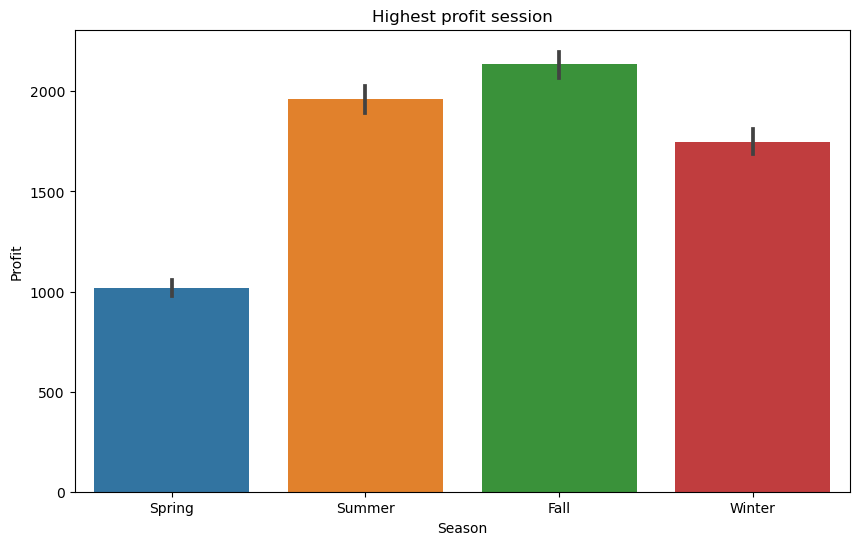

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x = train['season'], y = train['profit'])
plt.xlabel("Season")
plt.ylabel("Profit")
plt.title("Highest profit session")

## Which weather condition that has more profit

In [28]:
train['weather'] = train['weather'].replace({1:'Clear',2:'Mist',3:'Rainy',4:'Snowy'})

In [30]:
train.groupby('weather').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
Clear,7192.0,1848.036025,1701.914873,8.028767,418.028767,1432.778767,2750.928767,8642.628767
Mist,2834.0,1593.484589,1499.295846,8.028767,360.628767,1184.728767,2373.728767,7855.428767
Rainy,859.0,1045.882434,1228.723610,8.028767,198.678767,614.828767,1416.378767,7736.528767
Snowy,1.0,1369.228767,NaN,1369.228767,1369.228767,1369.228767,1369.228767,1369.228767


Text(0.5, 1.0, 'Weather on profit')

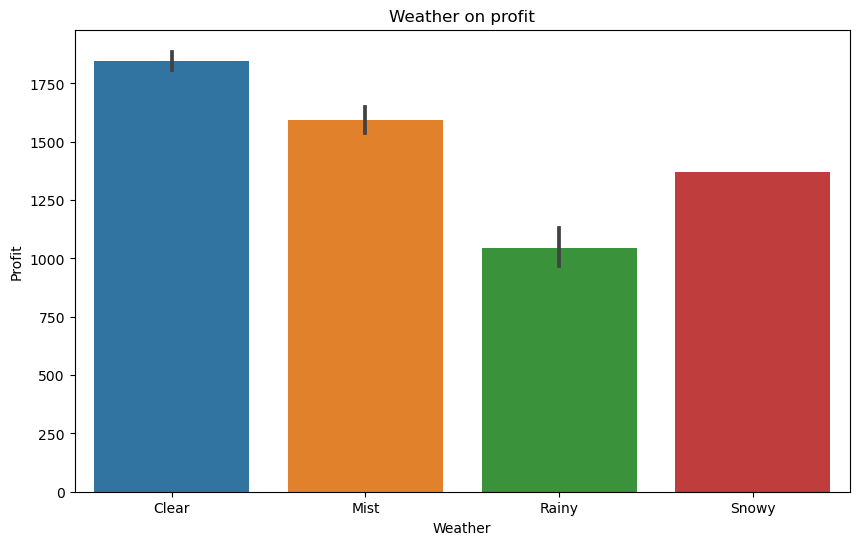

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x = train['weather'], y = train['profit'])
plt.xlabel('Weather')
plt.ylabel('Profit')
plt.title("Weather on profit")

## Correlation between profit & bikes count with all features

<AxesSubplot:>

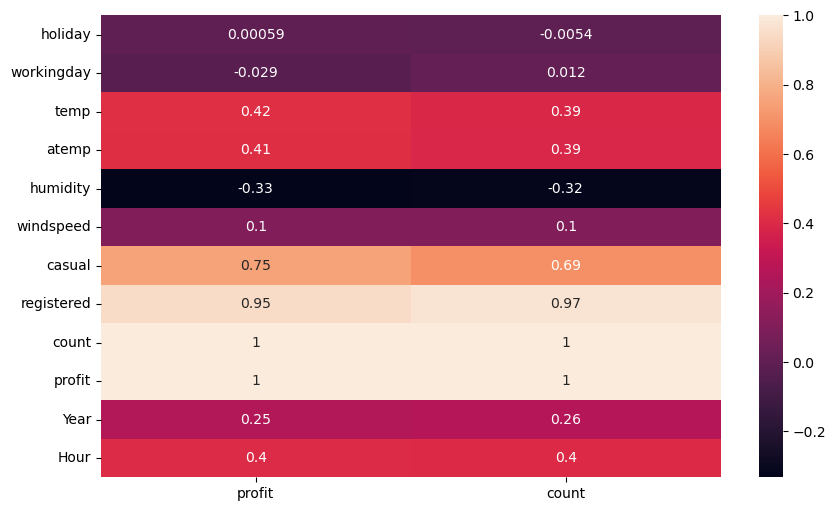

In [32]:
plt.figure(figsize = (10, 6))
sns.heatmap(train.corr()[['profit','count']],annot = True)

# Model Buliding